In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
ID_52_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_052_2020.csv',dtype = {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates = ['CreateDateTime'],index_col = 'Unnamed: 0')
ID_85_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_085_2020.csv',dtype = {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates = ['CreateDateTime'],index_col = 'Unnamed: 0')

<AxesSubplot:xlabel='CreateDateTime'>

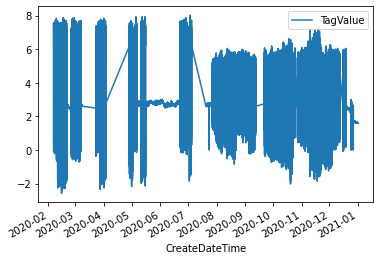

In [3]:
ID_52_2020.plot('CreateDateTime','TagValue')

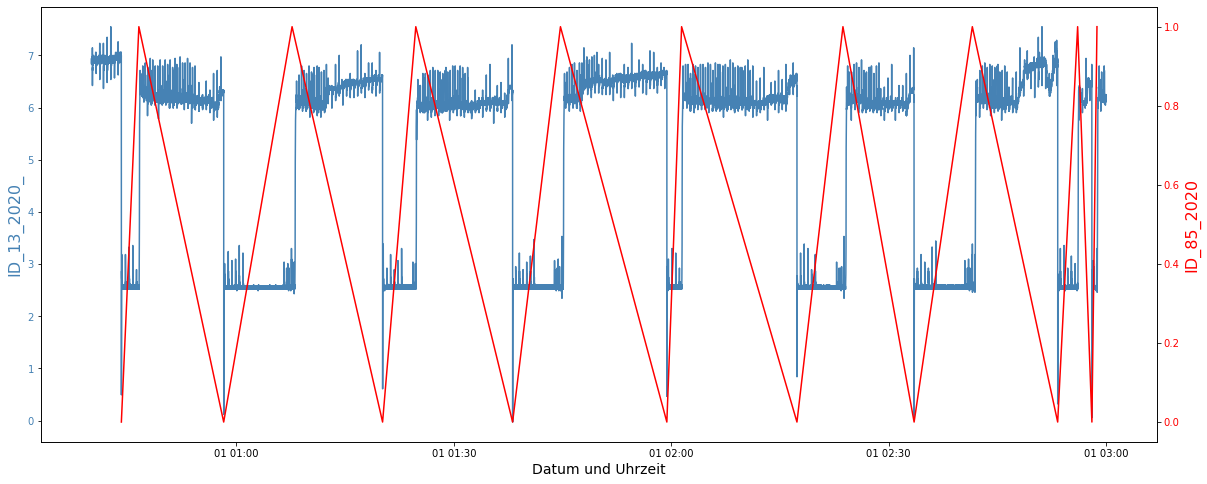

In [7]:
Daten_1=ID_52_2020
Daten_2=ID_85_2020


Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-03-01 00:40:00')&(Daten_1['CreateDateTime']<'2020-03-01 03:00:00')]
Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-03-01 00:40:00')&(Daten_2['CreateDateTime']<'2020-03-01 03:00:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('ID_13_2020_', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
#plt.ylim((0, 100))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('ID_85_2020', color=col2, fontsize=16)
ax2.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
#plt.ylim((-1,10))

In [4]:
ID_52_85_2018 = ID_52_2020.set_index('CreateDateTime').join(ID_85_2020.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
#ID_58_141_2018 = ID_58_141_2018.interpolate()
ID_52_85_2018 = ID_52_85_2018.fillna(method = "ffill")
ID_52_85_2018

,TagValue_l,TagId_l,TagValue_r,TagId_r
CreateDateTime,,,,
2020-02-06 13:05:56.982,2.575232,52.0,0.0,85.0
2020-02-06 13:05:58.643,2.517361,52.0,0.0,85.0
2020-02-06 13:05:59.049,2.575232,52.0,0.0,85.0
2020-02-06 13:06:00.073,2.604167,52.0,0.0,85.0
2020-02-06 13:06:00.277,2.575232,52.0,0.0,85.0
...,...,...,...,...
2020-12-31 23:08:28.691,1.591435,52.0,0.0,85.0
2020-12-31 23:23:26.096,1.620370,52.0,0.0,85.0
2020-12-31 23:23:26.307,1.591435,52.0,0.0,85.0


In [5]:
ID_52_85_2018.isnull().any()

TagValue_l    False
TagId_l       False
TagValue_r    False
TagId_r       False
dtype: bool

In [ ]:
# df=ID_58_141_2018.dropna()
# df

Pandas computed Pearson r: 0.8751443632510033
Scipy computed Pearson r: 0.8751443632615736 and p-value: 0.0


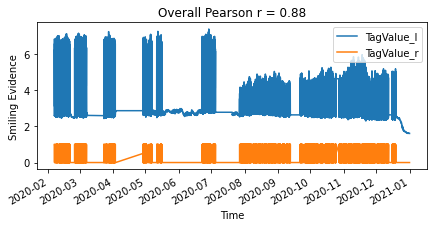

In [6]:
df = ID_52_85_2018 
overall_pearson_r = df.corr().iloc[0,2]
print(f"Pandas computed Pearson r: {overall_pearson_r}")


r, p = stats.pearsonr(df.dropna()['TagValue_l'], df.dropna()['TagValue_r'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


df2=df[['TagValue_l','TagValue_r']]
f,ax=plt.subplots(figsize=(7,3))
df2.rolling(window=150,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Smiling Evidence')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}")
plt.show()